In [1]:
from habitat_dataset import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
import cv2

transform_ = transforms.ToPILImage()

In [2]:
from habitat_dataset import HabitatDataset# import _get_direction
HabitatDataset._get_direction

<function habitat_dataset.HabitatDataset._get_direction(self, start, end=None)>

In [3]:
# transforms = transforms.Compose([
#     InterpolateFilter()
# ])

d = HabitatDataset('test/000001', interpolate=True)

In [8]:
i = 5
d._get_direction(i)

tensor([ 2.8010, -2.0804])

In [5]:
# import sys
# sys.path.append('/Users/nimit/Documents/robomaster/habitat/habitat-api')
# from habitat.tasks.nav.nav import *
from pyquaternion import Quaternion

source_position = d.positions[i]
source_rotation = Quaternion(*d.rotations[i,1:], d.rotations[i,0])
goal_position   = d.end_position

direction_vector = goal_position - source_position
direction_vector_agent = source_rotation.inverse.rotate(direction_vector)
print([-direction_vector_agent[2], -direction_vector_agent[0]])
# rho, phi = cartesian_to_polar(-direction_vector_agent[2], -direction_vector_agent[0])
# np.array([rho, -phi], dtype=np.float32)

[2.8010348540345076, -2.0804451952931187]


In [ ]:
#### HABITAT-API version
import quaternion
def cartesian_to_polar(x, y):
    rho = np.sqrt(x ** 2 + y ** 2)
    phi = np.arctan2(y, x)
    return rho, phi

def quaternion_rotate_vector(quat: np.quaternion, v: np.array) -> np.array:
    r"""Rotates a vector by a quaternion

    Args:
        quaternion: The quaternion to rotate by
        v: The vector to rotate

    Returns:
        np.array: The rotated vector
    """
    vq = np.quaternion(0, 0, 0, 0)
    vq.imag = v 
    return (quat * vq * quat.inverse()).imag\

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

rho, phi = d.compass[:,0], -d.compass[:,1]
pol2cart(rho, phi)

# import sys
# sys.path.append('/Users/nimit/Documents/robomaster/habitat/habitat-api')
# from habitat.tasks.nav.nav import *
from pyquaternion import Quaternion

source_position = np.array(d.positions[i])
source_rotation = np.quaternion(*d.rotations[i])
goal_position   = np.array(d.end_position)

direction_vector = goal_position - source_position
direction_vector_agent = quaternion_rotate_vector(source_rotation.inverse(), direction_vector)
print([-direction_vector_agent[2], direction_vector_agent[0]])

rho, phi = cartesian_to_polar(-direction_vector_agent[2], direction_vector_agent[0])
np.array([rho, -phi], dtype=np.float32)

In [46]:
pol2cart(4.92034, -0.39795437)

(4.5358433379295136, -1.9067959852486713)

tensor(1)


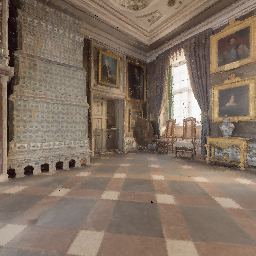

In [16]:
rgb, mapview, segmentation, action, meta, episode = d[5]
print(action)
Image.fromarray(np.uint8(rgb))

In [17]:
R = Image.fromarray(np.uint8(rgb))

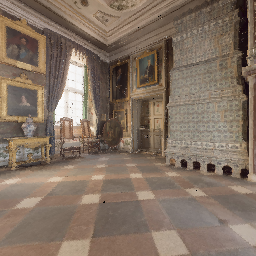

In [20]:
R.transpose(Image.FLIP_LEFT_RIGHT)

# So 1155 hand-labelled => 3465 interpolated labelled => 5775 original

AKA: multiply by 5 lol